### **Machine Learning/Neural Networks**

Now that the data has been pre-processed to my liking (so far) we can begin the fun process of finding a machine learning algorithm that will best predict the winner of a game!

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
import pickle

os.chdir('C:\\Users\\Mike Delevan\\Documents\\gl2010_18')

Predicting the winner of a game is a classification problem, therefore Logistic Regression will need to be used to determine the Win/Loss Outcome.

Here we will create a logistic regression model and train it over all files. For each of these files we will split them into 80% training sets and 20% test sets. The training set will be used to train our model so that it can generalize well enough for data it hasn't seen before, such as the test set. The test set will be used to analyze the accuracy of our model and will let us decide whether we need to modify our data or the model.

In [ ]:
data = pd.read_csv('combinedDataBad.csv')

data.drop(['Visting Team','Date', 'League', 'Home Team', 'League.1', 'Park ID'], axis=1, inplace=True)
data.drop(['Winning Pitcher ID', 'Visting Team Stolen Bases', 'Saving Pitcher ID','Home Team Stolen Bases', 'Visting Team Caught Stealing',
            'Home Team Caught Stealing', 'Visting Team G Double Play', 'Home Team G Double Play',
            'Losing Pitcher ID', 'Saving Pitcher ID', 'Visiting Starter Pitcher ID', 'Home Starter Pitcher ID',
            'Visting Team Awarded First on Interference', 'Home Team Awarded First on Interference',
            'Visting Team Balks', 'Home Team Balks', 'Visting Team Put-outs', 'Home Team Put-outs',
            'Visting Team Assists', 'Visting Team Passed Balls', 'Home Team Passed Balls',
            'Visting Team Double Plays','Attendance', 'Home Team Double Plays',
            'Home Team Triple Plays', 'Visting Team Triple Plays', 'Home Team Triples',
            'Visiting Team Sac Hits', 'Home Team Int Walks', 'Visting Team Int Walks',
            'Home Team Sac Hits', 'Length of Game in Outs', 'Visting Team Sac Flys', 'Home Team Sac Flys',
            'Home Team Wild Pitches', 'Home Team HBP', 'Visting Team HBP', 'Visting Team Wild Pitches',
            'Visiting Team Game Number', 'Home Team Game Number', 'wonPrev'], axis=1, inplace=True)

try:
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
    data.drop(['Unnamed: 75'], axis=1, inplace=True)

except KeyError:
    print("Column is not in the file!!!")

data.dropna(axis=0)

plt.subplots(figsize=(35,35))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.gcf().subplots_adjust(top=.95,bottom=0.35)
plt.xticks(rotation=45,ha='right')
fig = plt.gcf()
plt.show()

This is the graph I showed in my first presentation which shows the correlation between all of the variables found in the dataframe. Because there are so many vairables in the dataframe, there ends up being no variables that correlate with a win. This is obviously not good and thus means that we need to do more data preprocessing which we have done. Let's show how well this unprocessed data will perform with a simple machine learning algorithm:

In [32]:
logmodel = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(data.drop('Win', axis=1),
                                                        data['Win'], test_size=0.20,
                                                        random_state=101)

Visiting Team Score              False
Home Team Score                  False
Visting Team At-Bats             False
Visting Team Hits                False
Visting Team Doubles             False
Visting Team Triples             False
Visting Team Home-Runs           False
Visting Team RBI                 False
Visting Team Walks               False
Visting Team Strikeouts          False
Visiting Team LOB                False
Visting Team Pitchers Used       False
Visting Team Ind ER              False
Visting Team Team ER             False
Visting Team Errors              False
Home Team At-Bats                False
Home Team Hits                   False
Home Team Doubles                False
Home Team Home-Runs              False
Home Team RBI                    False
Home Team Walks                  False
Home Team Strikeouts             False
Home Team LOB                    False
Home Team Pitchers Used          False
Home Team Ind ER                 False
Home Team Team ER        

Here we are modifying the data into a 80/20 train/test split along with their actual labels also split. Here, scikit-learn comes with a pre-packaged method that splits the data into a specified size which is really handy. First, we drop the Win column from the dataframe, which will become X_train and X_test, as that is the label we're predicting and supply that to train_test_split. We then feed those Win values back into train_test_split to get y_train and y_test so that we can measure the accuracy of our model. We supply our test set size to get a good split like 80/20 or 70/30. A seed is also set so that the results can be consistent across developers. Now that this is out of the way, let's train on bad data!

In [33]:
logmodel.fit(X_train, y_train)


logistic_reg_score_train = logmodel.score(X_train, y_train)
print("Percentage correct on training set = ", 100. * logistic_reg_score_train, "%")

c:\users\mike delevan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Percentage correct on training set =  50.43052893554939 %


So without any sort of preprocessing our model can get 50.4% correct on the training set which isn't good but isn't bad either, kind of like the Red Sox. Let's see how it does on the test set, AKA data it's never seen before:

              precision    recall  f1-score   support

           0       0.48      0.44      0.46      4386
           1       0.48      0.53      0.50      4354

    accuracy                           0.48      8740
   macro avg       0.48      0.48      0.48      8740
weighted avg       0.48      0.48      0.48      8740

[[1916 2470]
 [2050 2304]]


[Text(0, 0.5, 'Loss'), Text(0, 1.5, 'Win')]

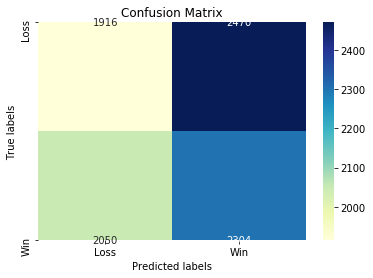

In [34]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

#plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.heatmap(pd.DataFrame(conf_matrix),annot=True, cmap="YlGnBu", fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Loss', 'Win'])
ax.yaxis.set_ticklabels(['Loss', 'Win'])

So our model does slightly worse on the test data getting around 48% correct on the test set. Let's see what happens when we use our preprocessed data!

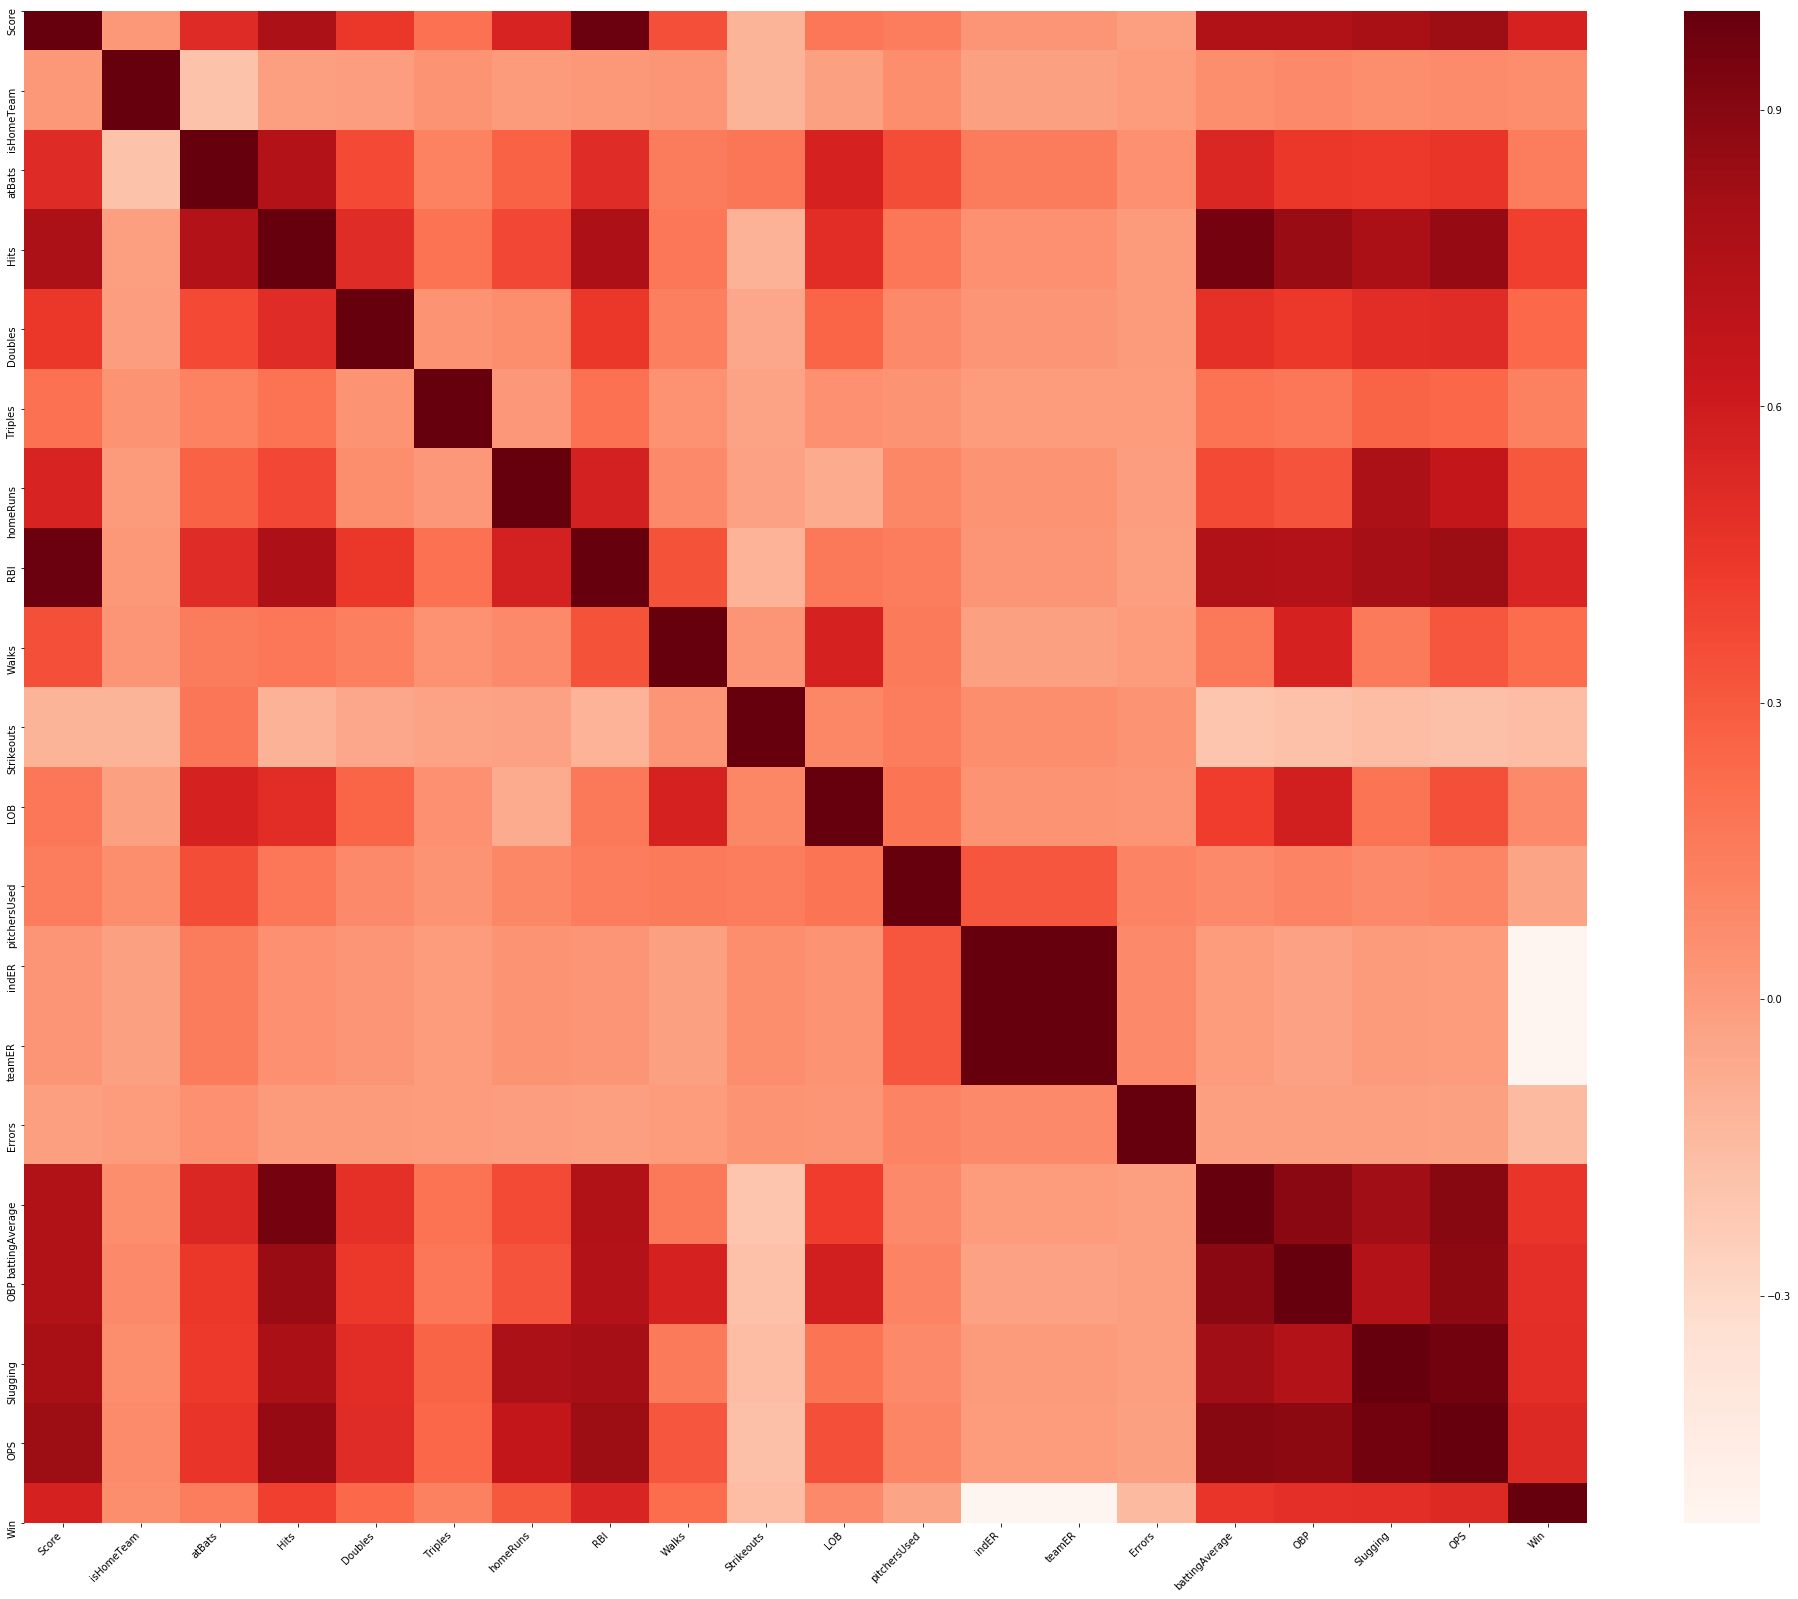

In [35]:
data = pd.read_csv('combinedData.csv')

data.drop(['teamAbbr','League', 'Unnamed: 0'], axis=1, inplace=True)

plt.subplots(figsize=(35,35))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.gcf().subplots_adjust(top=.95,bottom=0.35)
plt.xticks(rotation=45,ha='right')
fig = plt.gcf()
plt.show()

Compared to the other correlation matrix, this is much better! As you can see there are a lot more variables that are correlated with a win such as OBP, OPS, and Score. Let's see how it does in the machine learning aspect:

In [36]:
logmodel = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(data.drop('Win', axis=1),
                                                        data['Win'], test_size=0.20,
                                                        random_state=101)

Score             False
isHomeTeam        False
atBats            False
Hits              False
Doubles           False
Triples           False
homeRuns          False
RBI               False
Walks             False
Strikeouts        False
LOB               False
pitchersUsed      False
indER             False
teamER            False
Errors            False
battingAverage    False
OBP               False
Slugging          False
OPS               False
Win               False
dtype: bool


In [37]:
logmodel.fit(X_train, y_train)


logistic_reg_score_train = logmodel.score(X_train, y_train)
print("Percentage correct on training set = ", 100. * logistic_reg_score_train, "%")

c:\users\mike delevan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Percentage correct on training set =  98.77423737186612 %


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4013
           1       0.98      0.99      0.99      4085

    accuracy                           0.99      8098
   macro avg       0.99      0.99      0.99      8098
weighted avg       0.99      0.99      0.99      8098

[[3937   76]
 [  34 4051]]


[Text(0, 0.5, 'Loss'), Text(0, 1.5, 'Win')]

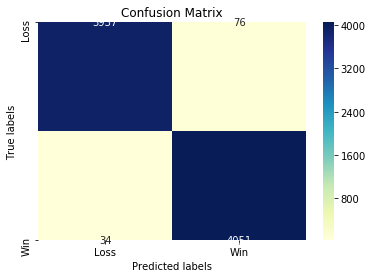

In [38]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

#plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.heatmap(pd.DataFrame(conf_matrix),annot=True, cmap="YlGnBu", fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Loss', 'Win'])
ax.yaxis.set_ticklabels(['Loss', 'Win'])

I see this as an absolute win. Now that we used pre-processed data, our accuracy jumped up from 48% to 99%. Although this may not be a good thing and the system may just be predicting based on past rows that it saw, basically cheating. I'm not sure how to exactly interpet this result as this is a new breakthrough. I will be discussing my finding with Dr. Rudniy and Dr. Graham later in the week.

While we are here let's also get the feature importance ranking to see which features are chosen to be the most important:

In [45]:
forest = ExtraTreesClassifier(n_estimators=500)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature Ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature Ranking:
1. teamER (0.219483)
2. indER (0.213093)
3. Score (0.136840)
4. RBI (0.124781)
5. OPS (0.051778)
6. Slugging (0.043047)
7. OBP (0.042754)
8. battingAverage (0.037233)
9. Hits (0.023802)
10. Errors (0.019074)
11. atBats (0.015908)
12. homeRuns (0.014954)
13. Walks (0.010729)
14. pitchersUsed (0.009595)
15. Doubles (0.009190)
16. LOB (0.008759)
17. Strikeouts (0.008510)
18. isHomeTeam (0.006899)
19. Triples (0.003571)
